___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle
from sklearn.metrics import classification_report, confusion_matrix
from dtreeviz.trees import *
import graphviz
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv('loan_data.csv')
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [3]:

notpaid=df[df["not.fully.paid"]==1]
paid=df[df["not.fully.paid"]==0]


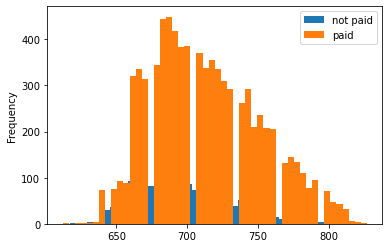

In [4]:
notpaid["fico"].plot.hist(bins=50,label='not paid')
paid["fico"].plot.hist(bins=50, label='paid')
plt.legend(loc='upper right')
plt.show()

<AxesSubplot:>

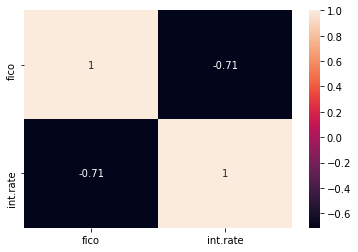

In [5]:
cor = pd.DataFrame(df,columns=['fico','int.rate'])
corrMatrix=cor.corr()
sns.heatmap(corrMatrix,annot=True)

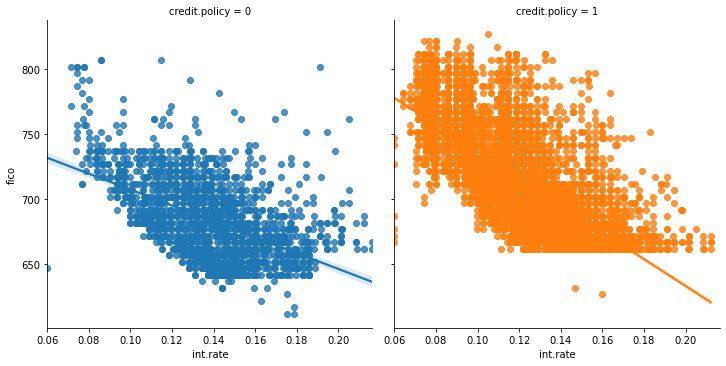

In [6]:
sns.lmplot(data=df,x='int.rate',y='fico',hue='credit.policy',col='credit.policy')

In [7]:
new=pd.get_dummies(df['purpose'],sparse=True)
df1=pd.concat([df,new],axis=1)
df1=df1.drop(['purpose'],axis='columns')
df1

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,all_other,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


In [8]:
X = df1[['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid','all_other','credit_card','debt_consolidation','educational','home_improvement','major_purchase','small_business']]
y = df1['credit.policy']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(solver='liblinear')

In [30]:
print("train data",lr.score(X_train,y_train))
print("test data",lr.score(X_test,y_test))
print("Confusion matrix ",confusion_matrix(y_test,lr.predict(X_test)))
print("Logistic coefficients",lr.coef_)
y_pred=lr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train data 0.8988514748107543
test data 0.8914405010438413
Confusion matrix  [[ 220  177]
 [  31 1488]]
Logistic coefficients [[-1.13571002e-01  2.34791116e-03 -4.97574196e-01 -2.41817531e-02
   1.23061077e-02  2.60291591e-04 -2.72359068e-05 -6.29657666e-03
  -8.94093274e-01 -5.39626833e-01 -1.27067769e-01 -4.86884695e-01
  -2.32634790e-01 -9.01844150e-02 -5.09323394e-02 -1.04215779e-01
   1.37783999e-01  2.22504408e-02  7.77585517e-02]]
Accuracy: 0.8914405010438413


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [20]:
from sklearn.tree import DecisionTreeClassifier
# for i in range(1,20):
clf = DecisionTreeClassifier(max_depth=15)
clf=clf.fit(X_train,y_train)
#     print(f'qty_depth = {i} Score = {clf.score(X_train,y_train)}')

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [31]:
print("train data",clf.score(X_train,y_train))
print("test data",clf.score(X_test,y_test))
print("Confusion matrix ",confusion_matrix(y_test,clf.predict(X_test)))
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train data 0.9997389715478987
test data 0.9906054279749478
Confusion matrix  [[ 384   13]
 [   5 1514]]
Accuracy: 0.9906054279749478


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


[Text(281.6965957856514, 210.645, 'inq.last.6mths <= 3.5\ngini = 0.31\nsamples = 7662\nvalue = [1471, 6191]'),
 Text(242.73967044454224, 197.055, 'fico <= 659.5\ngini = 0.169\nsamples = 6676\nvalue = [623, 6053]'),
 Text(227.77120378521127, 183.465, 'fico <= 634.5\ngini = 0.014\nsamples = 281\nvalue = [279, 2]'),
 Text(223.0557108274648, 169.875, 'days.with.cr.line <= 1034.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(218.34021786971832, 156.285, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(227.77120378521127, 156.285, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(232.48669674295775, 169.875, 'gini = 0.0\nsamples = 275\nvalue = [275, 0]'),
 Text(257.70813710387324, 183.465, 'days.with.cr.line <= 1109.5\ngini = 0.102\nsamples = 6395\nvalue = [344, 6051]'),
 Text(252.99264414612676, 169.875, 'gini = 0.0\nsamples = 130\nvalue = [130, 0]'),
 Text(262.4236300616197, 169.875, 'revol.bal <= 115477.0\ngini = 0.066\nsamples = 6265\nvalue = [214, 6051]'),
 Text(237.2021897007042

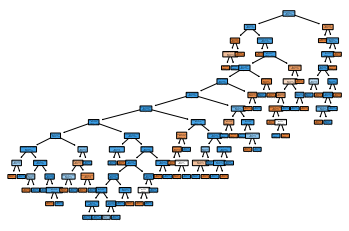

In [21]:
# viz = dtreeviz(clf, 
#                x_data=X_train,
#                y_data=y_train,
#                target_name='credit.policy',
#                feature_names=('int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid','all_other','credit_card','debt_consolidation','educational','home_improvement','major_purchase','small_business'), 
#                class_names=['0','1'], 
#                title="Decision Tree - Iris data set")
# viz
tree.plot_tree(clf, filled=True, feature_names=['int.rate','installment','log.annual.inc','dti','fico','days.with.cr.line','revol.bal','revol.util','inq.last.6mths','delinq.2yrs','pub.rec','not.fully.paid','all_other','credit_card','debt_consolidation','educational','home_improvement','major_purchase','small_business'], rounded=True)

In [24]:
xgboost_model = xgb.XGBClassifier(n_estimators=100)
xgboost_model.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print("train data",xgboost_model.score(X_train,y_train))
print("test data",xgboost_model.score(X_test,y_test))
print("Confusion matrix ",confusion_matrix(y_test,xgboost_model.predict(X_test)))
y_pred=xgboost_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train data 1.0
test data 0.9916492693110647
Confusion matrix  [[ 385   12]
 [   4 1515]]
Accuracy: 0.9916492693110647


In [33]:
rand = RandomForestClassifier(n_estimators=100)
rand.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


RandomForestClassifier()

In [34]:
print("train data",rand.score(X_train,y_train))
print("test data",rand.score(X_test,y_test))
print("Confusion matrix ",confusion_matrix(y_test,rand.predict(X_test)))
y_pred=rand.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

train data 1.0
test data 0.9864300626304802
Confusion matrix  [[ 373   24]
 [   2 1517]]
Accuracy: 0.9864300626304802


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


In [38]:
vot_clf=VotingClassifier(estimators=[('lr',lr),('rand',rand),('xgboost_model',xgboost_model),('clf',clf)],voting='soft')

In [39]:
vot_clf.fit(X_train,y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('rand', RandomForestClassifier()),
                             ('xgboost_model',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=8,
              

In [41]:
pred=vot_clf.predict(X_test)
metrics.accuracy_score(y_test,pred)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.9900835073068893

In [43]:
for model in (lr,rand,xgboost_model,clf,vot_clf):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(model.__class__.__name__, metrics.accuracy_score(y_test,y_pred))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression 0.8914405010438413


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomForestClassifier 0.9859081419624217
[14:51:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.9916492693110647
DecisionTreeClassifier 0.9895615866388309


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass o

[14:51:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
VotingClassifier 0.9911273486430062


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\validation.py:508: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


XGBclassifier is the best model in terms of accuracy for this task

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [44]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

In [47]:
data = pd.read_csv(url)

In [51]:
data.city.unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [54]:
print(data['date.utc'].min())
print(data['date.utc'].max())

2019-05-07 01:00:00+00:00
2019-06-21 00:00:00+00:00


In [63]:
paris=data[data['city']=='Paris']
antwerpen=data[data['city']=='Antwerpen']
london=data[data['city']=='London']

In [96]:
# date_time=pd.to_datetime(data['date.utc'],format='%Y-%m-%d %H:%M:%S')
london1=pd.to_datetime(london['date.utc'])
antwerpen1=pd.to_datetime(antwerpen['date.utc'])
paris1=pd.to_datetime(paris['date.utc'])

In [97]:
ldt=london1.dt.dayofweek
adt=antwerpen1.dt.dayofweek
pdt=paris1.dt.dayofweek

In [99]:
london.insert(7,"Day.Of.Week",ldt)
antwerpen.insert(7,"Day.Of.Week",adt)
paris.insert(7,"Day.Of.Week",pdt)
paris

,city,country,date.utc,location,parameter,value,unit,Day.Of.Week
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,4
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,3
...,...,...,...,...,...,...,...,...
999,Paris,FR,2019-05-07 05:00:00+00:00,FR04014,no2,72.4,µg/m³,1
1000,Paris,FR,2019-05-07 04:00:00+00:00,FR04014,no2,61.9,µg/m³,1
1001,Paris,FR,2019-05-07 03:00:00+00:00,FR04014,no2,50.4,µg/m³,1
1002,Paris,FR,2019-05-07 02:00:00+00:00,FR04014,no2,27.7,µg/m³,1


In [100]:
NO2L=london.groupby('Day.Of.Week')['value'].mean()
NO2A=antwerpen.groupby('Day.Of.Week')['value'].mean()
NO2P=paris.groupby('Day.Of.Week')['value'].mean()

In [101]:
print(NO2L)
print(NO2A)
print(NO2P)

Day.Of.Week
0    23.969697
1    24.885714
2    23.460432
3    24.780142
4    26.446809
5    24.977612
6    24.859155
Name: value, dtype: float64
Day.Of.Week
0    27.875000
1    22.214286
2    21.125000
3    27.500000
4    28.400000
5    33.500000
6    21.896552
Name: value, dtype: float64
Day.Of.Week
0    24.856250
1    30.999359
2    29.165753
3    28.600690
4    31.617986
5    25.266154
6    23.274306
Name: value, dtype: float64


In [114]:
meanCity = {'London': [NO2L[0],NO2L[1],NO2L[2],NO2L[3],NO2L[4],NO2L[5],NO2L[6]],'Antwerpen':[NO2A[0],NO2A[1],NO2A[2],NO2A[3],NO2A[4],NO2A[5],NO2A[6]],'Paris':[NO2P[0],NO2P[1],NO2P[2],NO2P[3],NO2P[4],NO2P[5],NO2P[6]]}
meanCity

{'London': [23.96969696969697,
  24.885714285714286,
  23.46043165467626,
  24.78014184397163,
  26.4468085106383,
  24.97761194029851,
  24.859154929577464],
 'Antwerpen': [27.875,
  22.214285714285715,
  21.125,
  27.5,
  28.4,
  33.5,
  21.896551724137932],
 'Paris': [24.856250000000003,
  30.999358974358973,
  29.165753424657538,
  28.600689655172417,
  31.617985611510797,
  25.26615384615384,
  23.274305555555543]}

In [157]:
meanCitydf=pd.DataFrame(meanCity, columns=['London','Antwerpen','Paris'],index=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
meanCitydf

,London,Antwerpen,Paris
Monday,23.969697,27.875000,24.856250
Tuesday,24.885714,22.214286,30.999359
Wednesday,23.460432,21.125000,29.165753
Thursday,24.780142,27.500000,28.600690
Friday,26.446809,28.400000,31.617986
Saturday,24.977612,33.500000,25.266154
Sunday,24.859155,21.896552,23.274306


In [139]:
data1=pd.to_datetime(data['date.utc']).dt.hour
data.insert(7,"hours",data1)
data

,city,country,date.utc,location,parameter,value,unit,hours
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,0
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,23
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,22
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,21
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,20
...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,6
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,4
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,3
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,2


In [146]:
NO2=data.groupby('hours')['value'].mean()
NO2
meanHour = {'NO2': [NO2[0],NO2[1],NO2[2],NO2[3],NO2[4],NO2[5],NO2[6],NO2[7],NO2[8],NO2[9],NO2[10],NO2[11],NO2[12],NO2[13],NO2[14],NO2[15],NO2[16],NO2[17],NO2[18],NO2[19],NO2[20],NO2[21],NO2[22],NO2[23]]}
meanHour

{'NO2': [27.955294117647057,
  26.125688073394493,
  23.55851063829787,
  23.242682926829268,
  22.979518072289157,
  27.070731707317076,
  30.635632183908044,
  31.34659090909091,
  29.138636363636362,
  26.07159090909091,
  22.602325581395345,
  21.27529411764706,
  21.029761904761905,
  21.008235294117647,
  21.737647058823526,
  23.84,
  24.972619047619045,
  26.691666666666666,
  27.089411764705883,
  28.143529411764703,
  29.372941176470587,
  30.973255813953486,
  32.45128205128205,
  31.189411764705888]}

In [148]:
meanHourdf=pd.DataFrame(meanHour, columns=['NO2'],index=['00:00','01:00','02:00','03:00','04:00','05:00','06:00','07:00','08:00','09:00','10:00','11:00','12:00','13:00','14:00','15:00','16:00','17:00','18:00','19:00','20:00','21:00','22:00','23:00'])
meanHourdf

,NO2
00:00,27.955294
01:00,26.125688
02:00,23.558511
03:00,23.242683
04:00,22.979518
05:00,27.070732
06:00,30.635632
07:00,31.346591
08:00,29.138636
09:00,26.071591


<BarContainer object of 24 artists>

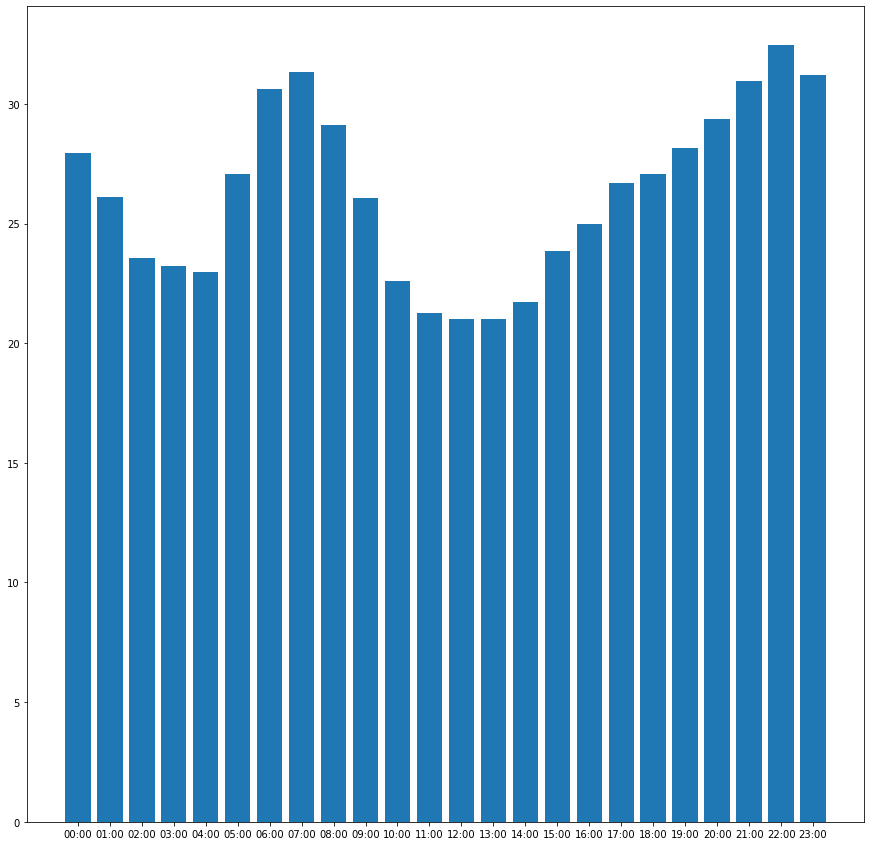

In [156]:
plt.figure(figsize=(15,15))
plt.bar(meanHourdf.index,meanHourdf['NO2'])
